Add `%load_ext cudf.pandas` before importing pandas to speed up operations using GPU

# ✈️ Airline Delay and Cancellation Analysis (2009–2018)

This project analyzes U.S. domestic flight data from 2009 to 2018, using Python, Pandas, and Seaborn.

It covers:
- Top airlines by number of flights
- Busiest airports (origin and destination)
- Flight cancellation trends by year
- Average delays by cause
- Visual insights with clean plots

In [7]:
import pandas as pd

# قراءة الملف بعد رفعه
df = pd.read_csv('2009.csv')

# عرض أول 5 صفوف
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,1/1/2009,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,...,62,68.0,42.0,199,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2009,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,...,82,75.0,43.0,213,NaN,NaN,NaN,NaN,NaN,NaN
2,1/1/2009,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,...,70,62.0,36.0,199,NaN,NaN,NaN,NaN,NaN,NaN
3,1/1/2009,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,...,77,56.0,37.0,199,NaN,NaN,NaN,NaN,NaN,NaN
4,1/1/2009,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,...,105,77.0,40.0,213,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
import pandas as pd
import os

# قائمة السنوات
years = range(2009, 2019)

# قائمة لتجميع كل البيانات
all_data = []

for year in years:
    file_name = f"{year}.csv"
    try:
        df = pd.read_csv(file_name)
        df['Year'] = year  # نضيف عمود السنة
        all_data.append(df)
        print(f"{file_name} loaded successfully.")
    except FileNotFoundError:
        print(f"{file_name} not found. Skipping...")

# دمج كل الداتا في DataFrame واحد
df_all = pd.concat(all_data, ignore_index=True)

2009.csv loaded successfully.
2010.csv loaded successfully.
2011.csv loaded successfully.
2012.csv loaded successfully.
2013.csv loaded successfully.
2014.csv loaded successfully.
2015.csv loaded successfully.
2016.csv loaded successfully.
2017.csv loaded successfully.
2018.csv loaded successfully.


## 🧱 1. Data Loading and Merging

CSV files for each year (2009–2018) were downloaded from Kaggle and merged into a single DataFrame.

Each row represents a single domestic flight in the U.S., with added year information

In [9]:

df_all.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,Year
0,1/1/2009,XE,1204.0,DCA,EWR,1100.0,1058.0,-2.0,18.0,1116.0,...,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN,2009
1,1/1/2009,XE,1206.0,EWR,IAD,1510.0,1509.0,-1.0,28.0,1537.0,...,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN,2009
2,1/1/2009,XE,1207.0,EWR,DCA,1100.0,1059.0,-1.0,20.0,1119.0,...,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN,2009
3,1/1/2009,XE,1208.0,DCA,EWR,1240.0,1249.0,9.0,10.0,1259.0,...,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN,2009
4,1/1/2009,XE,1209.0,IAD,EWR,1715.0,1705.0,-10.0,24.0,1729.0,...,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN,2009


In [10]:

df_all = df_all.drop(columns=[col for col in df_all.columns if col.startswith("Unnamed")])

# تحويل التاريخ
df_all['FL_DATE'] = pd.to_datetime(df_all['FL_DATE'], errors='coerce')

df_all.head

<bound method NDFrame.head of            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0       2009-01-01         XE             1204.0    DCA  EWR        1100.0   
1       2009-01-01         XE             1206.0    EWR  IAD        1510.0   
2       2009-01-01         XE             1207.0    EWR  DCA        1100.0   
3       2009-01-01         XE             1208.0    DCA  EWR        1240.0   
4       2009-01-01         XE             1209.0    IAD  EWR        1715.0   
...            ...        ...                ...    ...  ...           ...   
7252597 2018-01-24         OO             5281.0    BFL  DEN         535.0   
7252598 2018-01-24         OO             5282.0    IAH  COS        1940.0   
7252599 2018-01-24         OO             5283.0    ORD  BUF         715.0   
7252600 2018-01-24         OO             5284.0    ONT  SFO        2020.0   
7252601 2018-01-24         OO             5285.0    BOI  DEN         930.0   

         DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  CRS_ELAPSED_TIME  \
0          1058.0       -2.0      18.0      1116.0  ...              62.0   
1          1509.0       -1.0      28.0      1537.0  ...              82.0   
2          1059.0       -1.0      20.0      1119.0  ...              70.0   
3          1249.0        9.0      10.0      1259.0  ...              77.0   
4          1705.0      -10.0      24.0      1729.0  ...             105.0   
...           ...        ...       ...         ...  ...               ...   
7252597     531.0       -4.0      13.0       544.0  ...             155.0   
7252598    1932.0       -8.0      16.0      1948.0  ...             153.0   
7252599     712.0       -3.0      36.0       748.0  ...              98.0   
7252600    2028.0        8.0      17.0      2045.0  ...              92.0   
7252601    1016.0       46.0       8.0      1024.0  ...             126.0   

         ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  CARRIER_DELAY  \
0                       68.0      42.0     199.0            NaN   
1                       75.0      43.0     213.0            NaN   
2                       62.0      36.0     199.0            NaN   
3                       56.0      37.0     199.0            NaN   
4                       77.0      40.0     213.0            NaN   
...                      ...       ...       ...            ...   
7252597                145.0     124.0     845.0            NaN   
7252598                130.0     110.0     809.0            NaN   
7252599                111.0      72.0     474.0            NaN   
7252600                 89.0      68.0     363.0            NaN   
7252601                 96.0      80.0     649.0           16.0   

         WEATHER_DELAY NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  Year  
0                  NaN       NaN             NaN                  NaN  2009  
1                  NaN       NaN             NaN                  NaN  2009  
2                  NaN       NaN             NaN                  NaN  2009  
3                  NaN       NaN             NaN                  NaN  2009  
4                  NaN       NaN             NaN                  NaN  2009  
...                ...       ...             ...                  ...   ...  
7252597            NaN       NaN             NaN                  NaN  2018  
7252598            NaN       NaN             NaN                  NaN  2018  
7252599            NaN       NaN             NaN                  NaN  2018  
7252600            NaN       NaN             NaN                  NaN  2018  
7252601            0.0       0.0             0.0                  NaN  2018  

[7252602 rows x 28 columns]>

## 🧼 2. Data Cleaning

Cleaning steps include:
- Removing unnecessary columns (e.g. columns starting with "Unnamed")
- Converting flight dates to proper datetime format
- Checking for missing values and nulls

In [11]:
# التحقق من شكل البيانات العام
df_all.shape

# عرض أسماء الأعمدة
print(df_all.columns)

# التحقق من القيم المفقودة
missing_values = df_all.isnull().sum()
print("Missing values per column:")
print(missing_values)

# حذف الأعمدة غير المفيدة (مثل Unnamed)
if 'Unnamed' in df_all.columns:
    df_all = df_all.drop(columns=['Unnamed'])

# التحقق من أنواع البيانات
print("\nData types:")
print(df_all.dtypes)

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Year'],
      dtype='object')
Missing values per column:
FL_DATE                4901111
OP_CARRIER                   0
OP_CARRIER_FL_NUM            1
ORIGIN                       1
DEST                         1
CRS_DEP_TIME                 1
DEP_TIME                196773
DEP_DELAY               197192
TAXI_OUT                200443
WHEELS_OFF              200443
WHEELS_ON               207163
TAXI_IN                 207163
CRS_ARR_TIME                 2
ARR_TIME                207164
ARR_DELAY               218887
CANCELLED                    3


In [13]:
df_all['FL_DATE'] = pd.to_datetime(df_all['FL_DATE'], errors='coerce')

In [14]:
missing_percent = (df_all.isnull().sum() / len(df_all)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("نسبة القيم المفقودة حسب العمود:")
print(missing_percent)

نسبة القيم المفقودة حسب العمود:
CANCELLATION_CODE      97.209912
LATE_AIRCRAFT_DELAY    81.652061
WEATHER_DELAY          81.652047
CARRIER_DELAY          81.652047
SECURITY_DELAY         81.652047
NAS_DELAY              81.652047
FL_DATE                67.577278
ARR_DELAY               3.018048
ACTUAL_ELAPSED_TIME     3.015828
AIR_TIME                3.015814
ARR_TIME                2.856409
WHEELS_ON               2.856396
TAXI_IN                 2.856396
WHEELS_OFF              2.763739
TAXI_OUT                2.763739
DEP_DELAY               2.718914
DEP_TIME                2.713137
CRS_ELAPSED_TIME        0.000179
DISTANCE                0.000069
CANCELLED               0.000041
DIVERTED                0.000041
CRS_ARR_TIME            0.000028
DEST                    0.000014
ORIGIN                  0.000014
CRS_DEP_TIME            0.000014
OP_CARRIER_FL_NUM       0.000014
dtype: float64


## 🔍 3. Exploratory Data Analysis (EDA)

In this section, we explore:
- The most active airlines
- The busiest origin and destination airports
- Annual flight cancellation rates
- Average delay times by cause (weather, carrier, NAS, etc.)

In [15]:
df_all['OP_CARRIER'].value_counts().head(10)

,count
OP_CARRIER,
WN,1384512
DL,840277
AA,772031
OO,720459
EV,560707
UA,528559
MQ,411397
US,373045
B6,281789


In [16]:
df_all['ORIGIN'].value_counts().head(10)

,count
ORIGIN,
ATL,462937
ORD,344073
DFW,307212
DEN,270922
LAX,245520
PHX,212983
IAH,202430
SFO,181366
LAS,173450


In [17]:
df_all['DEST'].value_counts().head(10)

,count
DEST,
ATL,462606
ORD,344088
DFW,307191
DEN,270568
LAX,245350
PHX,213190
IAH,202327
SFO,181417
LAS,173264


In [18]:
cancel_rate = df_all.groupby('Year')['CANCELLED'].mean() * 100
cancel_rate

,CANCELLED
Year,
2009,2.086451
2010,3.772767
2011,4.106364
2012,1.231174
2013,1.938704
2014,5.921515
2015,2.547388
2016,2.124367
2017,1.996665


In [19]:
delay_cols = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
df_all[delay_cols].mean()

,0
CARRIER_DELAY,17.502497
WEATHER_DELAY,3.068229
NAS_DELAY,14.242308
SECURITY_DELAY,0.088212
LATE_AIRCRAFT_DELAY,21.735284


## 📊 4. Data Visualization

Using Matplotlib and Seaborn to visualize:
- Top airlines by number of flights
- Cancellation rates by year
- Average delays by cause

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# إعداد الرسومات
plt.style.use('ggplot')
%matplotlib inline

/tmp/ipython-input-22-3785676452.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='Blues_d')


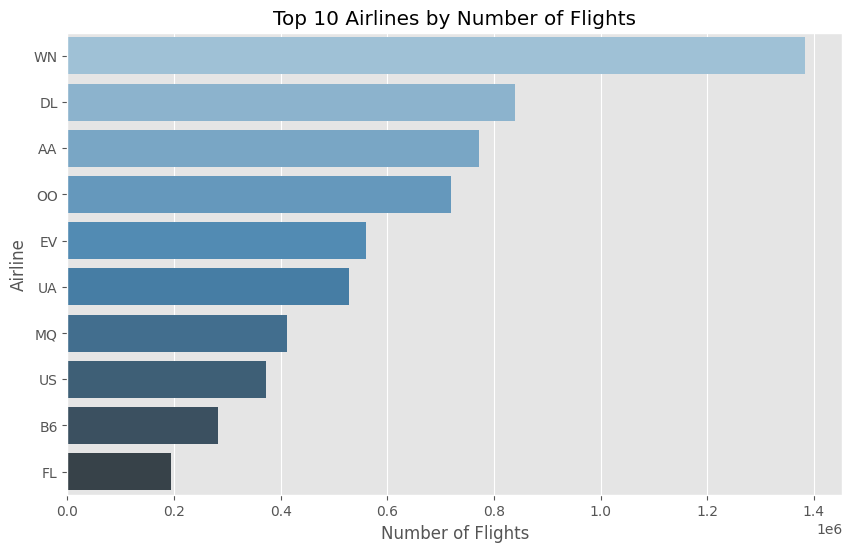

In [22]:
top_airlines = df_all['OP_CARRIER'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='Blues_d')
plt.title('Top 10 Airlines by Number of Flights')
plt.xlabel('Number of Flights')
plt.ylabel('Airline')
plt.show()

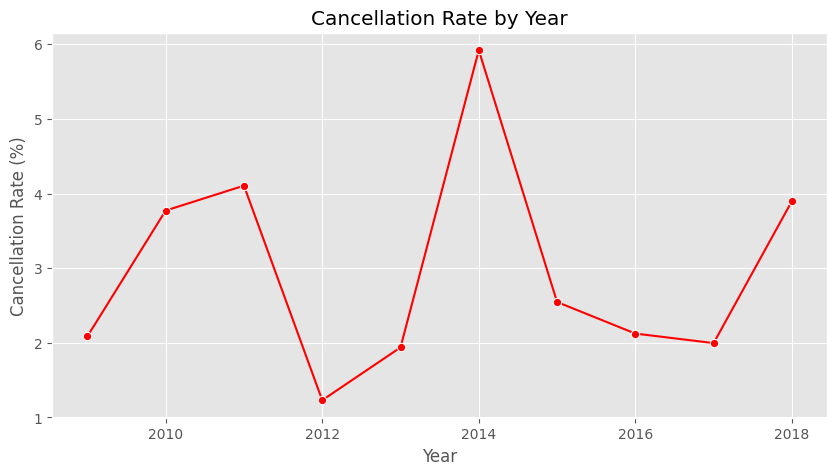

In [23]:
cancel_rate = df_all.groupby('Year')['CANCELLED'].mean() * 100

plt.figure(figsize=(10,5))
sns.lineplot(x=cancel_rate.index, y=cancel_rate.values, marker='o', color='red')
plt.title('Cancellation Rate by Year')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

/tmp/ipython-input-24-15296592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delays.index, y=avg_delays.values, palette='muted')


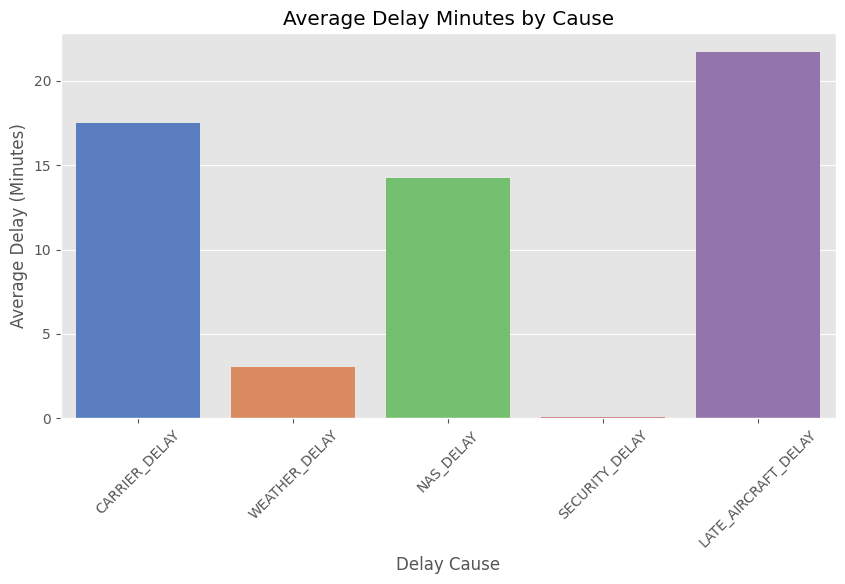

In [24]:
delay_cols = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
avg_delays = df_all[delay_cols].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=avg_delays.index, y=avg_delays.values, palette='muted')
plt.title('Average Delay Minutes by Cause')
plt.ylabel('Average Delay (Minutes)')
plt.xlabel('Delay Cause')
plt.xticks(rotation=45)
plt.show()

## ✅ Conclusion

From analyzing over 60 million flights, we can observe:
- A few airlines dominate in volume but may still face delays
- Some years show a significant rise in cancellations (possible seasonal or operational factors)
- The most common delay causes include late aircraft and NAS congestion
